#**Import the Required Libraries**

In [1]:
from IPython.display import Image

In [2]:
import tensorflow as tf

In [3]:
!sudo apt-get install tensorrt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorrt is already the newest version (8.6.1.6-1+cuda12.0).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


#**Clone the Github Repo**

In [4]:
!git clone https://github.com/MuhammadMoinFaisal/YOLOv8-DeepSORT-Object-Tracking.git

fatal: destination path 'YOLOv8-DeepSORT-Object-Tracking' already exists and is not an empty directory.


In [5]:
!pwd

/content


##Setting the Current Directory

In [6]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking

/content/YOLOv8-DeepSORT-Object-Tracking


##Install all the Dependencies

In [7]:
!pip install -e '.[dev]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/YOLOv8-DeepSORT-Object-Tracking
  Preparing metadata (setup.py) ... done
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.3
    Uninstalling ultralytics-8.0.3:
      Successfully uninstalled ultralytics-8.0.3
  Running setup.py develop for ultralytics


##Moving to the Required Directory

In [8]:
%cd /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


##Importing the Dataset from the RoboFlow

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nwcdIBjQY1She00q8ZEH")
project = rf.workspace("symbiosis-institute-of-technology-pune").project("drone-detecting-and-tracking")
dataset = project.version(2).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Drone-Detecting-and-Tracking-2 in yolov8:: 100%|██████████| 1922/1922 [00:01<00:00, 1904.83it/s]


##To implement the DeepSORT tracking, downloading the required files 

In [10]:
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t
To: /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/deep_sort_pytorch.zip
100% 43.1M/43.1M [00:00<00:00, 133MB/s]


##Unzipping the DeepSORT Files

In [11]:
!unzip 'deep_sort_pytorch.zip'

Archive:  deep_sort_pytorch.zip
  inflating: deep_sort_pytorch/.gitignore  
   creating: deep_sort_pytorch/configs/
  inflating: deep_sort_pytorch/configs/deep_sort.yaml  
   creating: deep_sort_pytorch/deep_sort/
  inflating: deep_sort_pytorch/deep_sort/__init__.py  
   creating: deep_sort_pytorch/deep_sort/__pycache__/
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/__init__.cpython-38.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-310.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-37.pyc  
  inflating: deep_sort_pytorch/deep_sort/__pycache__/deep_sort.cpython-38.pyc  
   creating: deep_sort_pytorch/deep_sort/deep/
 extracting: deep_sort_pytorch/deep_sort/deep/__init__.py  
   creating: deep_sort_pytorch/deep_sort/deep/__pycache__/
  inflating: deep_sort_pytorch/d

#**Training the Custom Model**

In [12]:
HOME = '/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect'

In [13]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [14]:
%cd {dataset.location}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Drone-Detecting-and-Tracking-2


In [15]:
%cd {HOME}

!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect
100% 83.7M/83.7M [00:02<00:00, 32.1MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Drone-Detecting-and-Tracking-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=Fals

#**Checking the Files inside the Train Folder**

In [16]:
!ls /content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train

args.yaml					    train_batch1681.jpg
confusion_matrix.png				    train_batch1682.jpg
events.out.tfevents.1683694119.397f67506924.2826.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1680.jpg


#**Printing the Confusion Matrix**

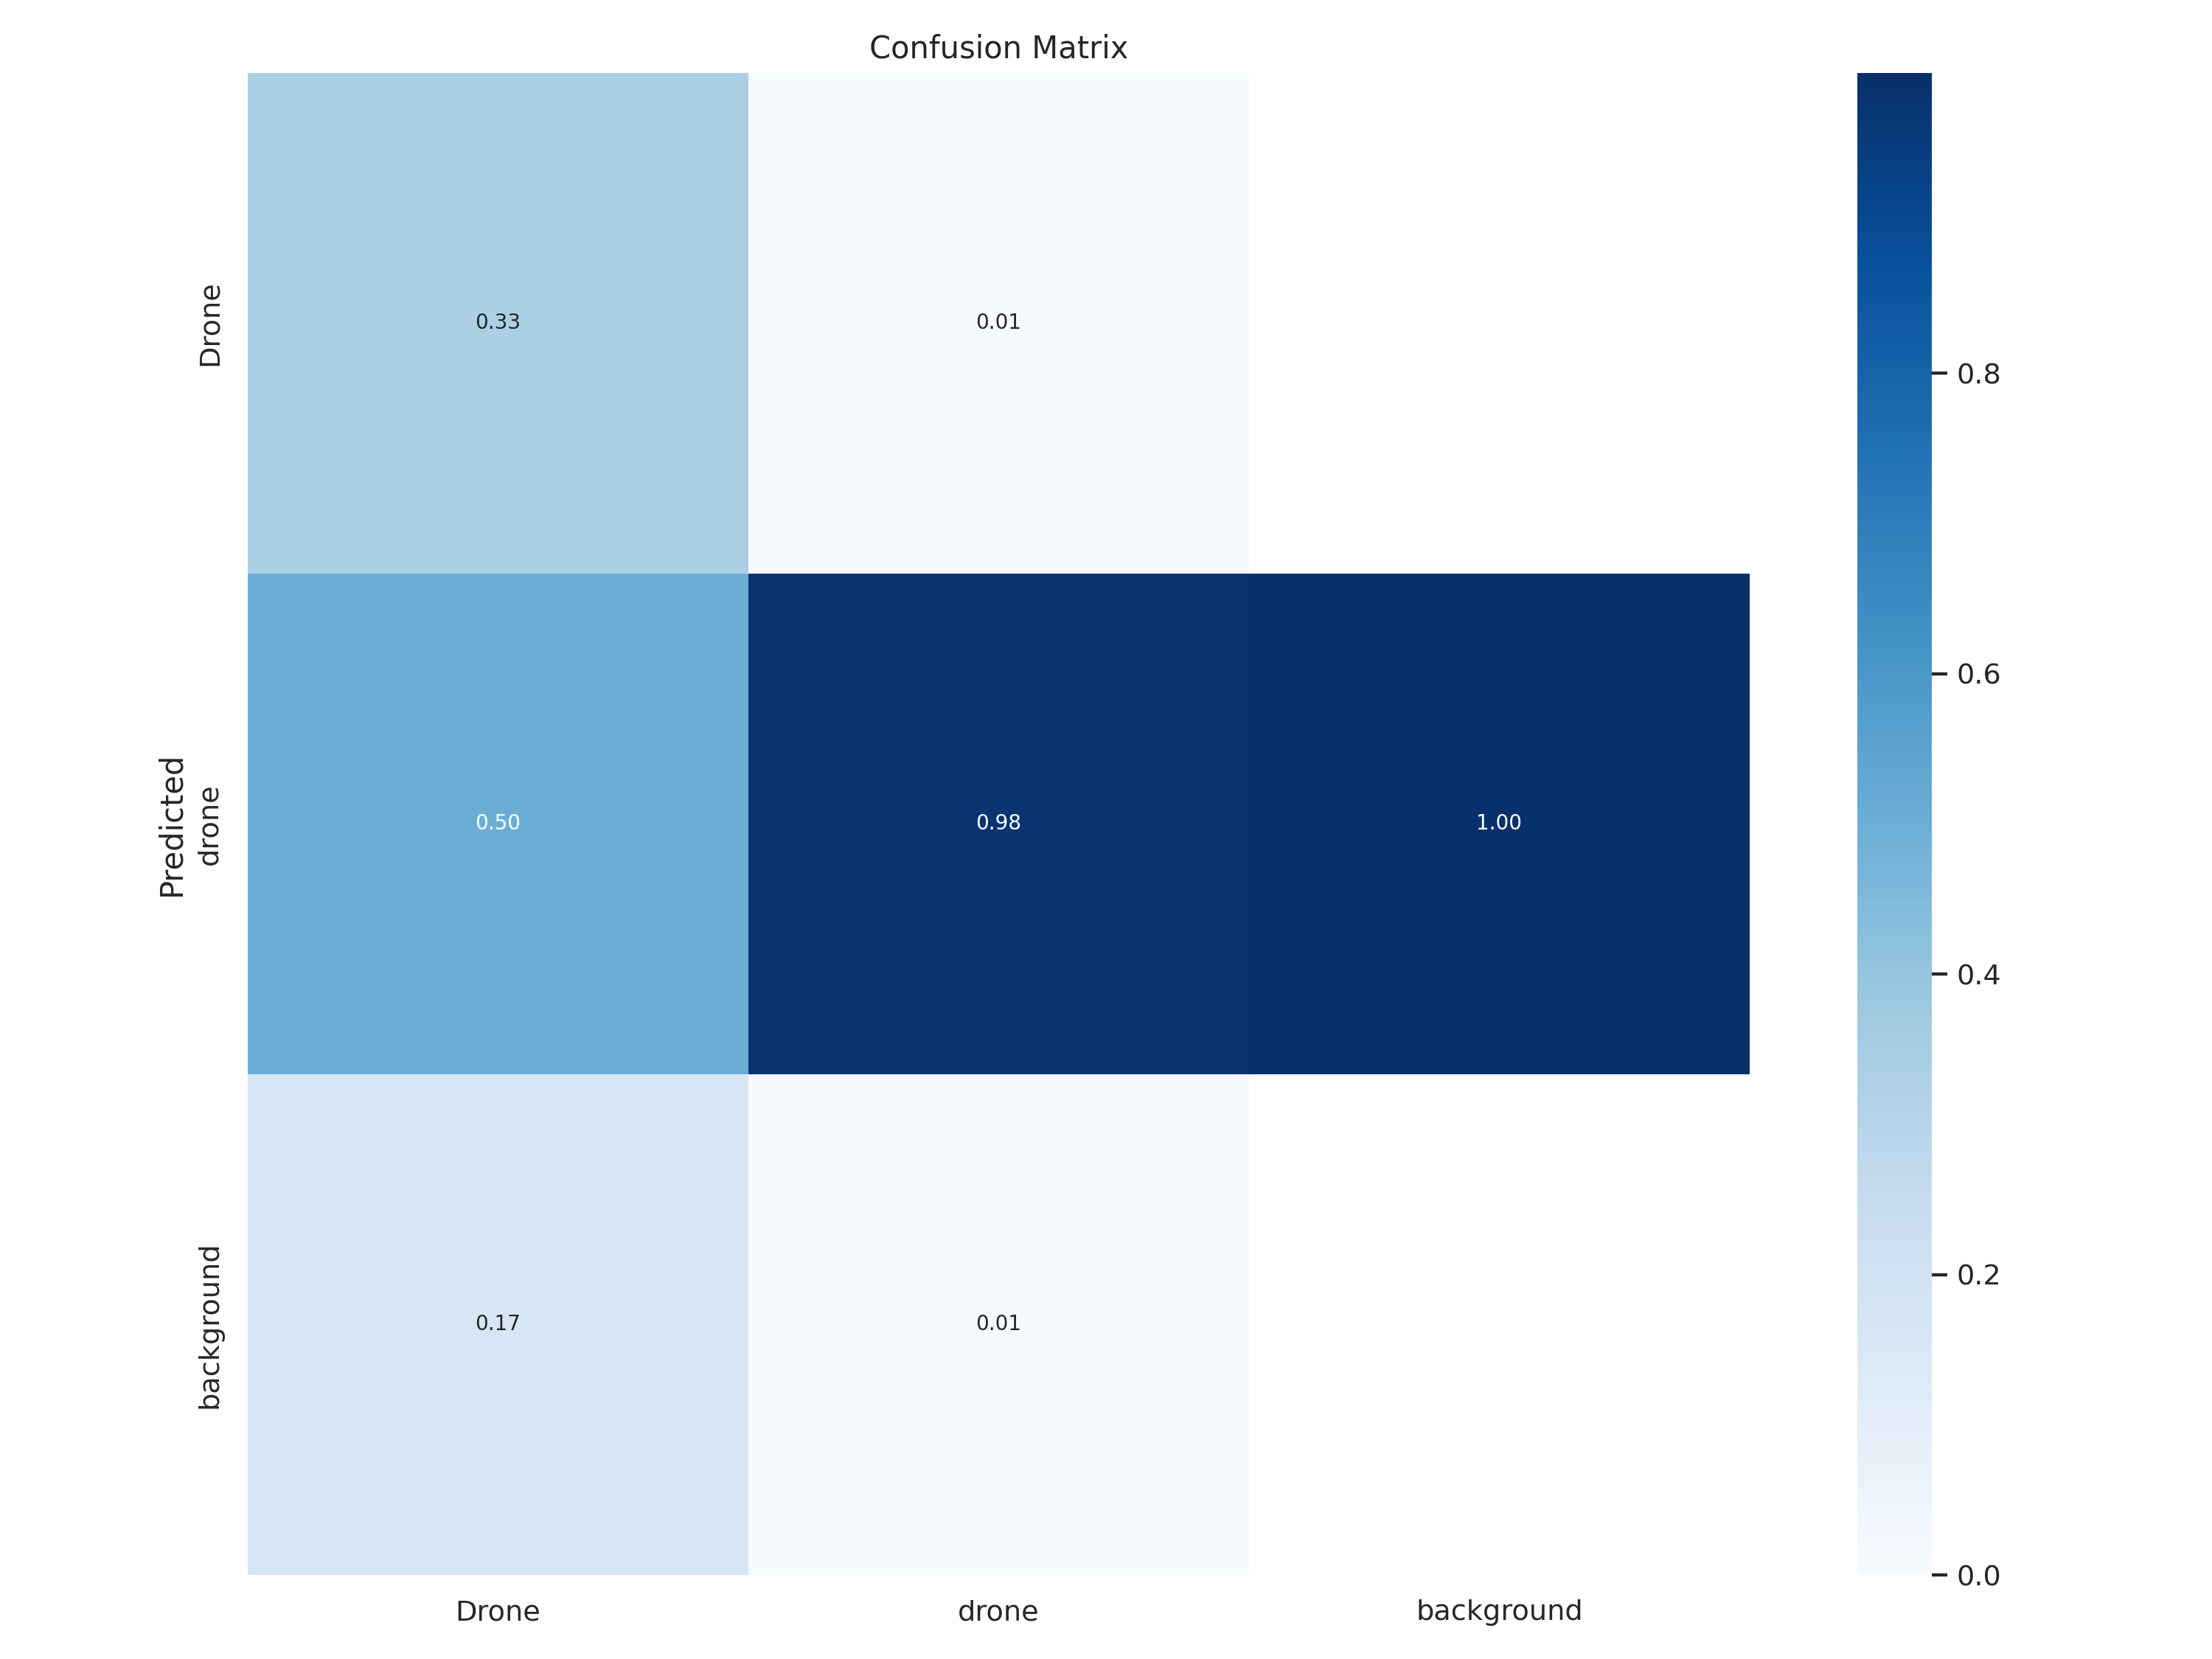

In [17]:
Image(filename = '/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/confusion_matrix.png', width = 600)

#**Printing the Training and the Validation Loss**

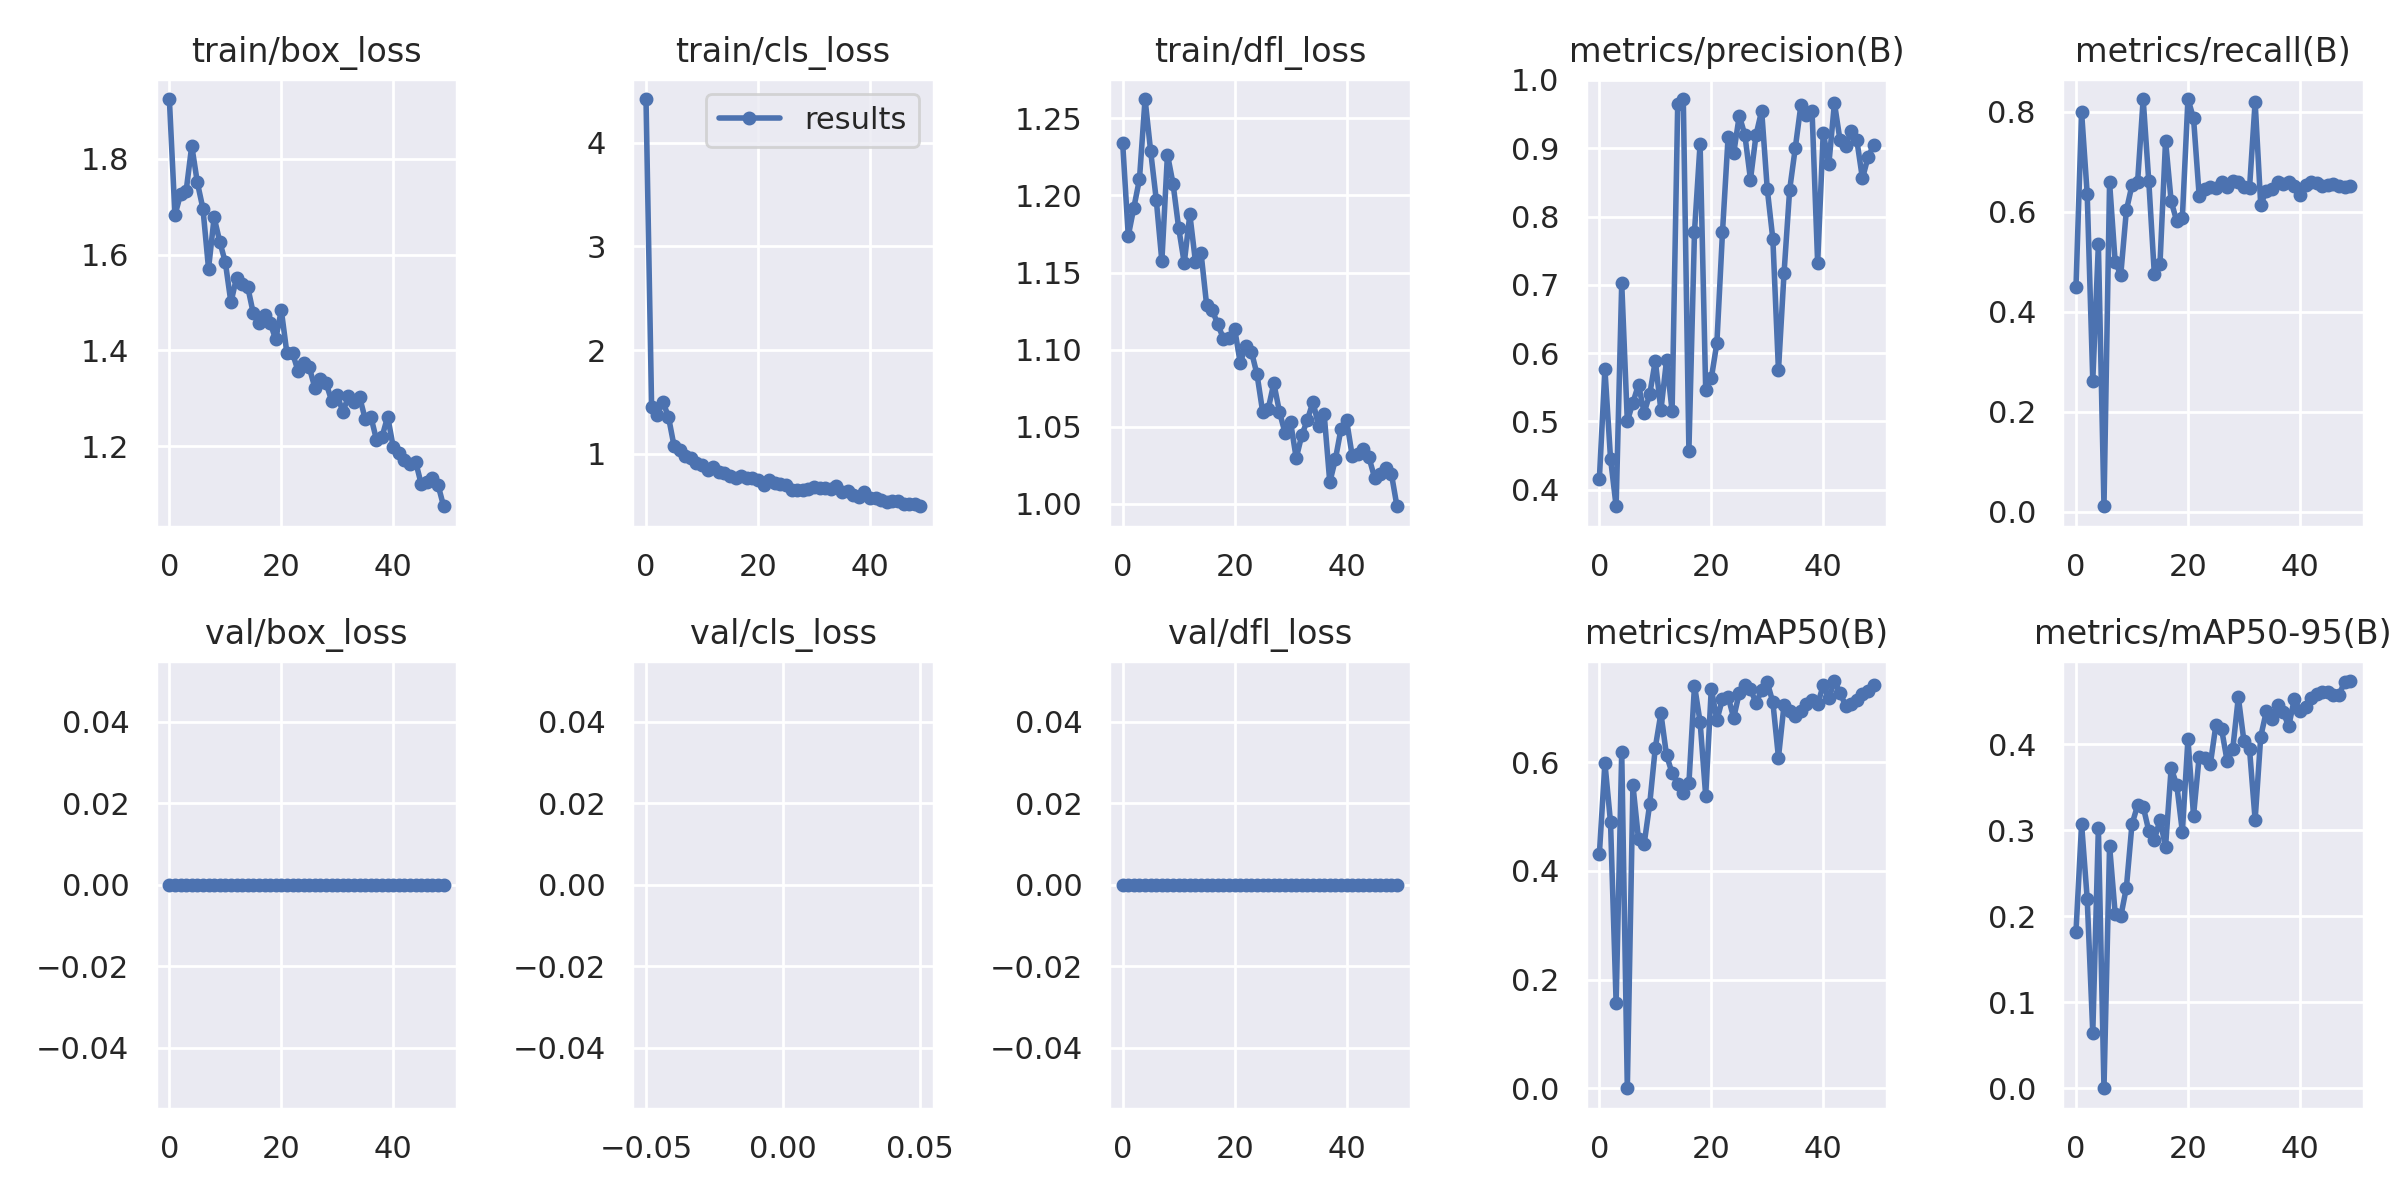

In [18]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/results.png', width = 600)

#**Printing the Model Prediction on Validation Batch**

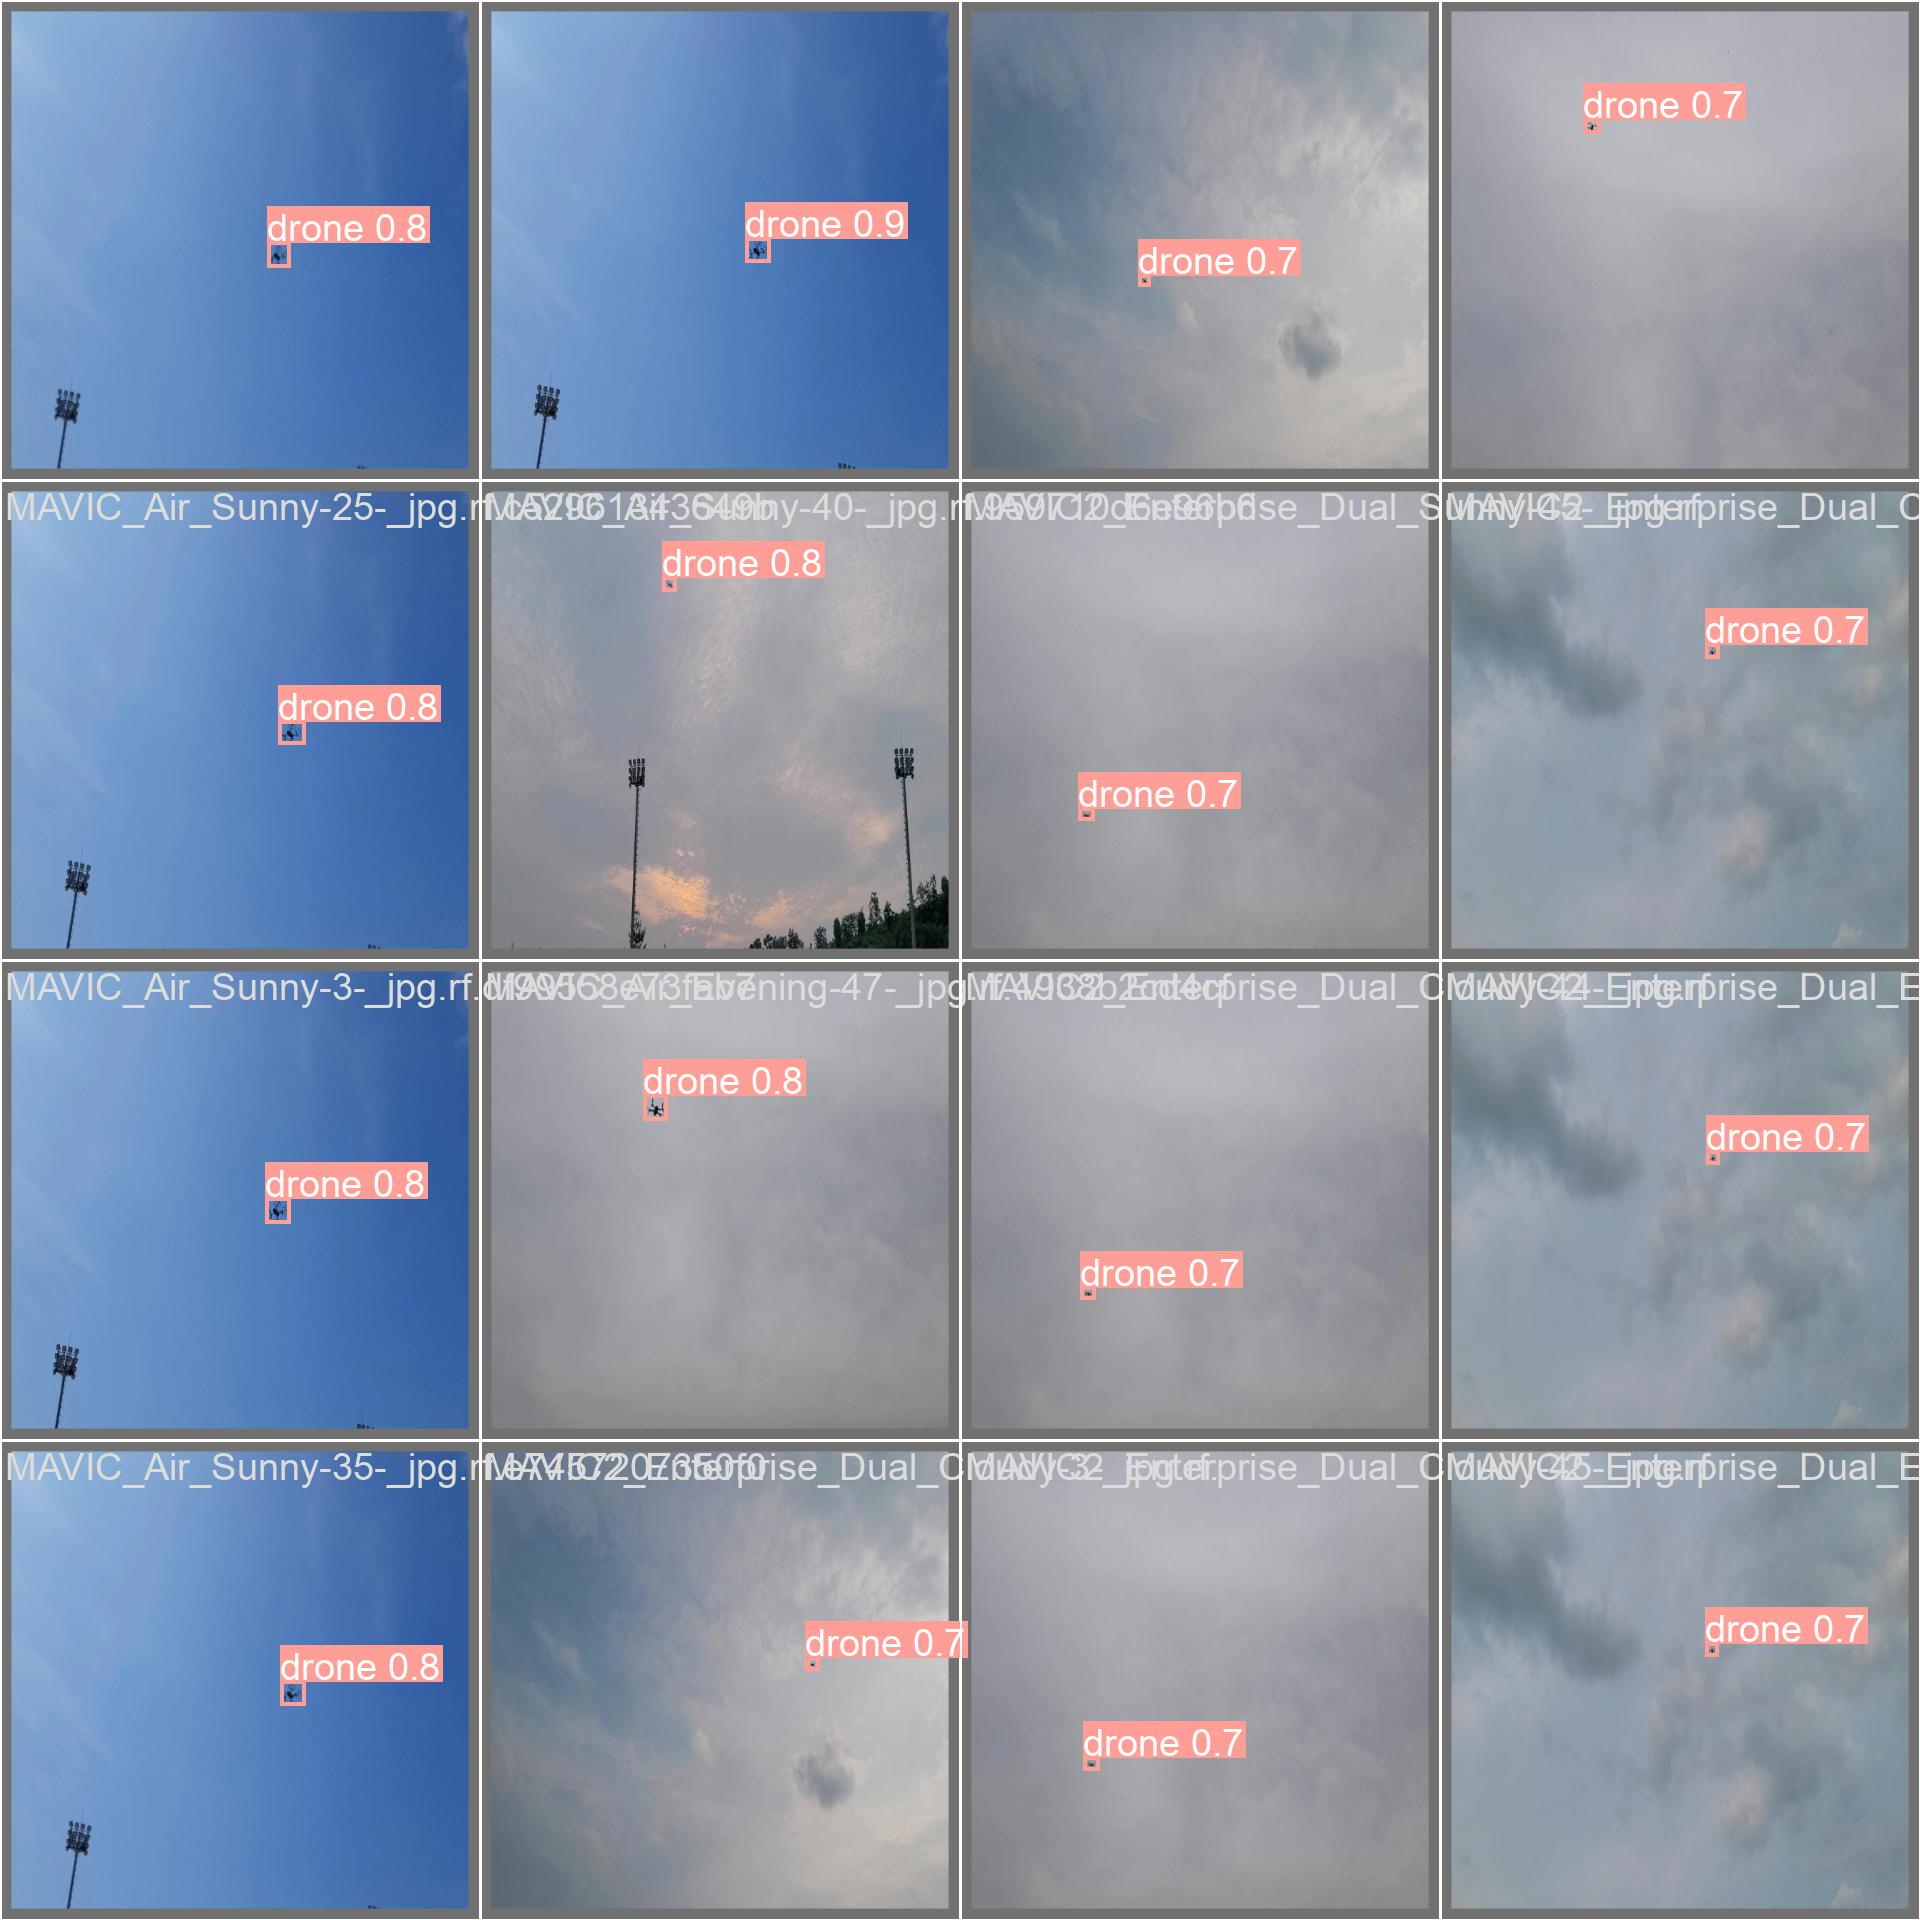

In [19]:
Image(filename = r'/content/YOLOv8-DeepSORT-Object-Tracking/runs/detect/train/val_batch2_pred.jpg', width =600)

In [22]:
%cd {HOME}

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


#**Validate Custom Model**

In [21]:
!pwd

/content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect


In [23]:
!python val.py model='best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/YOLOv8-DeepSORT-Object-Tracking/ultralytics/yolo/v8/detect/Drone-Detecting-and-Tracking-2/valid/labels.cache... 191 images, 8 backgrounds, 0 corrupt: 100% 191/191 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:10<00:00,  1.13it/s]
                   all        191        185      0.904      0.651      0.742      0.474
                 Drone        191          6      0.842      0.333      0.504      0.287
                 drone        191        179      0.967      0.969       0.98      0.661
Speed: 2.3ms pre-process, 35.5ms inference, 0.0ms loss, 2.7ms post-process per image


#**Inference with Custom Model**

In [24]:
!python predict.py model='best.pt' source='/content/Test1.mp4'

[2023-05-10 05:24:41,715][root.tracker][INFO] - Loading weights from deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
Ultralytics YOLOv8.0.3 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
video 1/1 (1/265) /content/Test1.mp4: 352x640 82.2ms
video 1/1 (2/265) /content/Test1.mp4: 352x640 31.4ms
video 1/1 (3/265) /content/Test1.mp4: 352x640 31.3ms
video 1/1 (4/265) /content/Test1.mp4: 352x640 31.3ms
video 1/1 (5/265) /content/Test1.mp4: 352x640 31.3ms
video 1/1 (6/265) /content/Test1.mp4: 352x640 1 drone, 24.3ms
video 1/1 (7/265) /content/Test1.mp4: 352x640 1 drone, 21.0ms
video 1/1 (8/265) /content/Test1.mp4: 352x640 2 drones, 20.9ms
video 1/1 (9/265) /content/Test1.mp4: 352x640 2 drones, 20.9ms
video 1/1 (10/265) /content/Test1.mp4: 352x640 1 drone, 20.7ms
video 1/1 (11/265) /content/Test1.mp4: 352x640 1 drone, 18.8ms
video 1/1 (12/265) /content/Test1.mp4: 352x640 1 dr